In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping, callbacks
import keras
from time import time

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# DATA SOURCE --------------------------------------------------

batch_size = 10
train_data_dir = "/content/drive/My Drive/Colab Notebooks/data/natural_images/dataset/Entrenamiento"
validation_data_dir = "/content/drive/My Drive/Colab Notebooks/data/natural_images/dataset/Tests"

train_datagen = ImageDataGenerator( #data augmentation
        rescale=1./255,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1, 
        rotation_range=14
)

validation_datagen = ImageDataGenerator( #data augmentation
        rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='categorical')



Found 125 images belonging to 5 classes.
Found 55 images belonging to 5 classes.


In [0]:
# MODEL --------------------------------------------------

from keras.layers.normalization import BatchNormalization

epochs = 10
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(8, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(0.0001),
              metrics=['accuracy'])

In [5]:
# TRAINING --------------------------------------------------

acc = model.fit_generator(
        generator = train_generator,
        epochs=epochs, 
        validation_data=validation_generator,
        shuffle=True
)

Epoch 1/10
13/13 [==============================] - 42s 3s/step - loss: 1.7218 - accuracy: 0.2160 - val_loss: 1.6426 - val_accuracy: 0.2000
Epoch 2/10
13/13 [==============================] - 4s 331ms/step - loss: 1.7224 - accuracy: 0.1600 - val_loss: 1.5763 - val_accuracy: 0.2182
Epoch 3/10
13/13 [==============================] - 4s 342ms/step - loss: 1.6127 - accuracy: 0.2400 - val_loss: 1.5329 - val_accuracy: 0.2364
Epoch 4/10
13/13 [==============================] - 4s 333ms/step - loss: 1.6599 - accuracy: 0.2320 - val_loss: 1.4575 - val_accuracy: 0.3091
Epoch 5/10
13/13 [==============================] - 4s 342ms/step - loss: 1.5822 - accuracy: 0.2960 - val_loss: 1.5244 - val_accuracy: 0.3273
Epoch 6/10
13/13 [==============================] - 4s 341ms/step - loss: 1.5660 - accuracy: 0.2480 - val_loss: 1.5478 - val_accuracy: 0.3091
Epoch 7/10
13/13 [==============================] - 5s 349ms/step - loss: 1.4865 - accuracy: 0.4080 - val_loss: 1.5869 - val_accuracy: 0.3636
Epoch 8/

In [0]:
#SAVING --------------------------------------------------

model.save("mimodelo.h5")

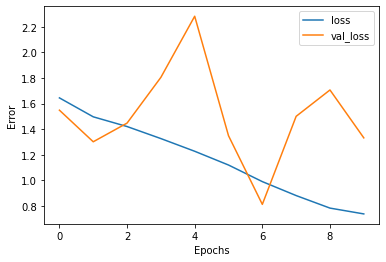

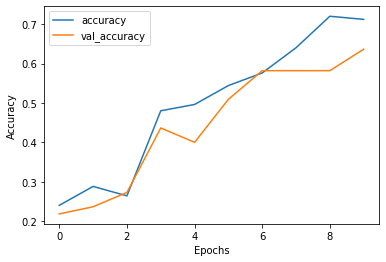

In [0]:
# GRAPHIC --------------------------------------------------
import matplotlib.pyplot as plt

#Se crea la gráfica con los progresos realizados por la red neuronal

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.plot(acc.history["loss"], label = "loss")
plt.plot(acc.history["val_loss"], label = "val_loss")
plt.legend()
plt.show()

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc.history["accuracy"], label = "accuracy")
plt.plot(acc.history["val_accuracy"], label = "val_accuracy")
plt.legend()
plt.show()